# Capstone I Preliminary EDA
7/15/2020

In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

In [2]:
df = pd.read_csv('../data/processed/EdStatsAggregated.csv')

In [3]:
df.head(2)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,United States,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,...,31.982700,33.147579,33.628712,33.561531,32.421581,31.586950,30.963221,31.109060,28.698191,NaN
1,1,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,10587.285756,11695.55442,12597.66751,13993.166744,14438.976276,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969


In [4]:
# df.info()

In [5]:
df.shape

(36, 43)

In [6]:
# df = df.dropna(axis=1)
# df.shape

In [7]:
df = df.drop(['Unnamed: 0', 'Country Name'], axis=1)

In [8]:
df.head(1)

,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9827,33.147579,33.628712,33.561531,32.421581,31.58695,30.963221,31.10906,28.698191,NaN


In [9]:
gdps = df[df['Indicator Code'] == 'NY.GDP.PCAP.CD']

In [10]:
primary_spend = df[df['Indicator Code'] == 'SE.XPD.PRIM.ZS']
primary_spend = primary_spend.dropna(axis=1)
primary_spend.head()

,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2013,2014
0,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,31.98270,33.147579,33.628712,33.561531,32.421581,31.586950,31.109060,28.698191
6,SWE,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,24.90185,25.046600,24.609659,24.074690,24.286600,24.259411,22.379950,22.780190
12,AUS,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,34.96822,35.141151,35.423229,35.963299,36.807030,35.971642,32.818642,32.625420
18,DEU,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,14.73804,14.023630,13.497080,13.549030,13.482980,13.211040,12.784330,12.793400
24,CHE,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,29.23546,29.386419,25.301100,27.927629,27.969919,28.911150,29.696461,29.575480


In [11]:
gdps = gdps.drop(['Indicator Name', 'Indicator Code'], axis=1)

In [12]:
gdps = gdps.dropna(axis=1)
gdps.head()

,Country Code,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,USA,12597.667510,13993.166744,14438.976276,15561.426396,17134.286017,18269.422168,19115.052908,20100.858892,21483.233060,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969
7,SWE,16856.761086,15366.668591,13545.259119,12430.458931,12914.330682,13474.161346,17727.495334,21485.293869,24188.765945,...,46256.471601,53324.379372,55746.842381,46207.059203,52076.255913,59593.287112,57134.077068,60283.245223,59180.198978,50812.190860
13,AUS,10201.978300,11844.632539,12778.662567,11528.168100,12448.783725,11452.656888,11379.523369,11643.947183,14283.384446,...,36118.283813,40991.982886,49664.685043,42742.998981,51874.080482,62245.100292,67677.634766,67792.303862,62214.609121,56554.038761
19,DEU,12092.381854,10170.446275,9876.228232,9827.022409,9277.932299,9393.891691,13410.897100,16614.410104,17863.437897,...,36447.872318,41814.819097,45699.198323,41732.707253,41785.556913,46810.327959,44065.248908,46530.911428,48042.563435,41323.921502
25,CHE,18832.196719,17153.401316,17478.655793,17341.994876,16499.146931,16655.337392,23751.449517,29558.895478,31743.652912,...,57579.501954,63555.237500,72487.845930,69927.468770,74605.721021,88415.628061,83538.230078,85112.464398,86605.563376,82016.021313


In [40]:
list(gdps[::-1])

['Country Code',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [15]:
# gdps.set_index('Country Code', inplace=True)
g = gdps.T
g.shape

(37, 6)

In [16]:
sns.pairplot(g)

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

In [147]:
g.corr(method='pearson')

Country Code,USA,SWE,AUS,DEU,CHE,GBR
Country Code,,,,,,
USA,1.000000,0.946167,0.901680,0.948776,0.945838,0.975368
SWE,0.946167,1.000000,0.946702,0.976855,0.978788,0.949264
AUS,0.901680,0.946702,1.000000,0.909664,0.962847,0.857645
DEU,0.948776,0.976855,0.909664,1.000000,0.979112,0.946594
CHE,0.945838,0.978788,0.962847,0.979112,1.000000,0.913579
GBR,0.975368,0.949264,0.857645,0.946594,0.913579,1.000000


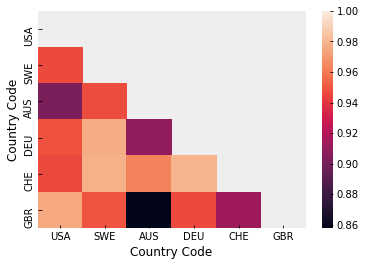

In [148]:
mask = np.triu(np.ones_like(g.corr()))
sns.heatmap(g.corr(), mask=mask)

In [79]:
country_codes = ['USA', 'SWE', 'AUS', 'DEU', 'CHE', 'GBR']
for country in country_codes:
    print(country)

USA
SWE
AUS
DEU
CHE
GBR


In [77]:
gdps.iloc[0].describe()

count       36.000000
mean     33413.086505
std      13322.622556
min      12597.667510
25%      22562.636082
50%      32260.943997
75%      46578.189175
max      56469.008969
Name: 1, dtype: float64

In [73]:
normal = stats.norm(gdps.iloc[0].mean(), gdps.iloc[0].std())

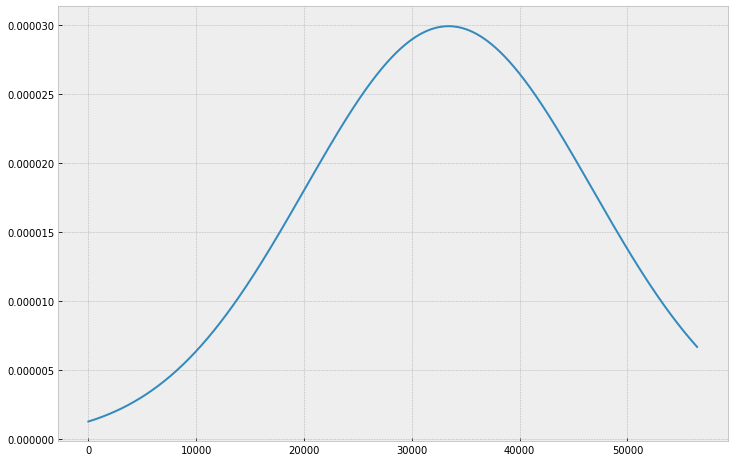

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(0, gdps.iloc[0].max(), num=1000)
ax.plot(x, normal.pdf(x))

In [108]:
df = pd.read_csv('../data/processed/EdStatsAggregated.csv')
df.head(1)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1978,1979,1980,1981,1982,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,United States,USA,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,NaN,NaN,NaN,NaN,NaN,...,31.9827,33.147579,33.628712,33.561531,32.421581,31.58695,30.963221,31.10906,28.698191,NaN


In [109]:
codes = ['SE.XPD.TOTL.GD.ZS',
         'SE.XPD.PRIM.ZS',
         'SE.PRM.ENRL.TC.ZS',
         'SE.PRM.TCHR',
         'SL.TLF.ADVN.ZS',
         'NY.GDP.PCAP.CD']

for code in codes:
    df2 = df.copy()
    df2 = df2[df2['Indicator Code'] == code]
    df2 = df2.dropna(axis=1)

In [110]:
df2.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1980,1981,1982,1983,1984,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,1,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,12597.667510,13993.166744,14438.976276,15561.426396,17134.286017,...,46437.067117,48061.537661,48401.427340,47001.555350,48373.878816,49790.665478,51450.122295,52787.026949,54598.550689,56469.008969
7,7,Sweden,SWE,GDP per capita (current US$),NY.GDP.PCAP.CD,16856.761086,15366.668591,13545.259119,12430.458931,12914.330682,...,46256.471601,53324.379372,55746.842381,46207.059203,52076.255913,59593.287112,57134.077068,60283.245223,59180.198978,50812.190860
13,13,Australia,AUS,GDP per capita (current US$),NY.GDP.PCAP.CD,10201.978300,11844.632539,12778.662567,11528.168100,12448.783725,...,36118.283813,40991.982886,49664.685043,42742.998981,51874.080482,62245.100292,67677.634766,67792.303862,62214.609121,56554.038761
19,19,Germany,DEU,GDP per capita (current US$),NY.GDP.PCAP.CD,12092.381854,10170.446275,9876.228232,9827.022409,9277.932299,...,36447.872318,41814.819097,45699.198323,41732.707253,41785.556913,46810.327959,44065.248908,46530.911428,48042.563435,41323.921502
25,25,Switzerland,CHE,GDP per capita (current US$),NY.GDP.PCAP.CD,18832.196719,17153.401316,17478.655793,17341.994876,16499.146931,...,57579.501954,63555.237500,72487.845930,69927.468770,74605.721021,88415.628061,83538.230078,85112.464398,86605.563376,82016.021313
